<center>
    <h1>Tema 3: Algoritmos de Aprendizaje Supervisado</h1>
    <h1>Clasificación</h1>
    <h1>k-Vecinos más Cercanos (kNN)</h1>
    <br>
    <h5>Prof. Wladimir Rodriguez</h5>
    <h5>wladimir@ula.ve</h5>
    <h5>Departamento de Computación</h5>
</center>

# Algoritmos de Clasificación: k-Vecinos más Cercanos

El algoritmo de los k-vecinos más cercanos (kNN en inglés) es un algoritmo fácil de entender e implementar.

El modelo para kNN es el conjunto de datos de entrenamiento completo. Cuando se requiere una predicción para una instancia de datos aún no vista, el algoritmo kNN buscará en el conjunto de datos de entrenamiento las k-instancias más similares. El atributo de predicción de las instancias más similares se resume y devuelve como la predicción para la instancia aún no vista.

La medida de similitud depende del tipo de datos. Para datos reales, se puede usar la distancia euclidiana. Otros otros tipos de datos tales como datos categóricos o binarios, se puede utilizar la distancia de Hamming.

En el caso de problemas de regresión, puede devolverse el promedio del atributo predicho. En el caso de clasificación, la clase más prevalente puede ser devuelta.

<img src="../figuras/knn.png" width="75%">

### Como funciona el k-Vecinos más Cercanos

El algoritmo kNN pertenece a la familia de aprendizaje basado en instancias, aprendizaje competitivo y algoritmos de aprendizaje perezosos.

Los algoritmos basados ​​en instancias son aquellos algoritmos que modelan el problema usando instancias de datos (o filas) para tomar decisiones predictivas. El algoritmo kNN es una forma extrema de métodos basados ​​en instancia porque todas las observaciones de entrenamiento son retenidas como parte del modelo.

Se trata de un algoritmo de aprendizaje competitivo, ya que utiliza internamente la competencia entre los elementos del modelo (instancias de datos) para tomar una decisión predictiva. La medida de similitud objetiva entre instancias de datos hace que cada instancia de datos compita para "ganar" o sea más similar a una instancia de datos no vista y contribuya a una predicción.

Lazy learning se refiere al hecho de que el algoritmo no construye un modelo hasta el momento en que se requiere una predicción. Es perezoso porque sólo funciona en el último segundo. Esto tiene el beneficio de incluir solamente datos relevantes para los datos no vistos, llamados un modelo localizado. Una desventaja es que puede ser costoso desde el punto de vista computacional repetir las mismas o similares búsquedas sobre conjuntos de datos de formación más grandes.

Finalmente, kNN es potente porque no asume nada acerca de los datos, aparte de una medida de distancia puede ser calculada consistentemente entre dos instancias cualesquiera. Como tal, se llama no paramétrico o no lineal ya que no asume una forma funcional.

## Ventajas y desventajas de k-Vecinos más Cercanos

### Ventajas
+ Facíl de implementar
+ El costo del proceso de aprendizaje es cero
+ No hace ninguna suposiciones acerca de los atributos de los conceptos a aprender
+ Conceptos complejos pueden ser aprendidos usando aproximaciones locales usando procedimientos sencillos

### Desventajas:
+ El modelo no se puede interpretar
+ Es computacionalmente costoso encontrar los k vecinos más cercanos cuando el conjunto de datos es muy grande
+ Rendimiento depende del número de dimensiones
+ Gran cantidad de almacenamiento

## Implementación del algoritmo k-Vecinos más Cercanos en Python

### Medida de Similitud

Para hacer predicciones necesitamos calcular la similitud entre dos instancias de datos dados. Esto es necesario para poder localizar las instancias de datos más similares en el conjunto de datos de entrenamiento para un miembro dado del conjunto de datos de prueba y, a su vez, hacer una predicción.

Para datos numéricos se puede utilizar la medida de distancia euclidiana. Esto se define como la raíz cuadrada de la suma de las diferencias al cuadrado entre las dos matrices de números.

Para esto se puede definir la función distanciaEuclidiana de la siguiente manera:

In [1]:
import math
def distanciaEuclidiana(instancia1, instancia2, tamaño):
    distancia = 0
    for x in range(tamaño):
        distancia += pow((instancia1[x] - instancia2[x]), 2)
    return math.sqrt(distancia)

In [2]:
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distancia = distanciaEuclidiana(data1, data2, 3)
print('Distancia: ' + repr(distancia))

Distancia: 3.4641016151377544


### Vecinos

Al tener una medida de similitud, se puede usar para recopilar las k-instancias más parecidas a una instancia aún no vista.

Este es un proceso sencillo de calcular la distancia para todas las instancias y seleccionar un subconjunto con los valores de distancia más pequeños.

A continuación se muestra la función `obtenerVecinos` que devuelve los k vecinos más similares del conjunto de entrenamiento para una instancia de prueba dada (utilizando la función `distanciaEuclidiana` ya definida)

In [3]:
import operator 
def obtenerVecinos(conjuntoEntrenamiento, instanciaPrueba, k):
    distancias = []
    tamaño = len(instanciaPrueba)-1
    for x in range(len(conjuntoEntrenamiento)):
        distancia = distanciaEuclidiana(instanciaPrueba, conjuntoEntrenamiento[x], tamaño)
        distancias.append((conjuntoEntrenamiento[x], distancia))
    distancias.sort(key=operator.itemgetter(1))
    vecinos = []
    for x in range(k):
        vecinos.append(distancias[x][0])
    return vecinos

In [4]:
conjuntoEntrenamiento = [[2, 2, 2, 'a'], [4, 4, 4, 'b'], [3, 3, 3, 'a']]
instanciaPrueba = [5, 5, 5]
k = 2
vecinos = obtenerVecinos(conjuntoEntrenamiento, instanciaPrueba, k)
print(vecinos)

[[4, 4, 4, 'b'], [3, 3, 3, 'a']]


### Respuesta

Una vez localizados los vecinos más similares para una instancia de prueba, la siguiente tarea es crear la respuesta de la clase predicha basada en esos vecinos.

Podemos hacer esto permitiendo a cada vecino votar por su atributo de clase, y tomar el voto de la mayoría como la predicción.

A continuación se proporciona una función para obtener la respuesta de mayoría votada de varios vecinos. Asume que la clase es el último atributo para cada vecino.

In [5]:
import operator
def obtenerRespuesta(vecinos):
    votosClases = {}
    for x in range(len(vecinos)):
        respuesta = vecinos[x][-1]
        if respuesta in votosClases:
            votosClases[respuesta] += 1
        else:
            votosClases[respuesta] = 1
    votosOrdenados = sorted(votosClases.items(), key=operator.itemgetter(1), reverse=True)
    return votosOrdenados[0][0]

In [6]:
vecinos = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
respuesta = obtenerRespuesta(vecinos)
print(respuesta)

a


### Exactitud

Para evaluar la exactitud de las predicciones del modelo se calcula la relación entre el total de predicciones correctas de todas las predicciones hechas, llamada exactitud de clasificación.

A continuación se muestra la función `obtenerExactitud` que suma las predicciones correctas totales y devuelve la precisión como un porcentaje de las clasificaciones correctas.

In [7]:
def obtenerExactitud(conjuntoPrueba, predicciones):
    correctas = 0
    for x in range(len(conjuntoPrueba)):
        if conjuntoPrueba[x][-1] == predicciones[x]:
            correctas += 1
    return correctas/len(conjuntoPrueba)

In [8]:
conjuntoPrueba = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predicciones = ['a', 'a', 'a']
exactitud = obtenerExactitud(conjuntoPrueba, predicciones)
print(exactitud)

0.6666666666666666


### Aplicar el algoritmo k-Vecinos más Cercanos al conjunto de datos Iris

Cargar los datos

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = np.c_[X, y]

Crear los conjuntos de entrenamiento y prueba

In [10]:
X_entrenamiento, X_prueba = train_test_split(X, test_size=0.3, random_state=0)
len(X_prueba)

45

Generar las predicciones

In [11]:
predicciones=[]
k = 3
for x in range(len(X_prueba)):
    vecinos = obtenerVecinos(X_entrenamiento, X_prueba[x], k)
    resultado = obtenerRespuesta(vecinos)
    predicciones.append(resultado)
exactitud = obtenerExactitud(X_prueba, predicciones)
print('Exactitud: {:.3f}'.format(exactitud))
print(len(predicciones))

Exactitud: 0.978
45


## Aplicar el algoritmo de KNN de sklearn

Mostrar gráfico de las regiones de decisión

In [14]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import graficar_regiones_decision as grd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

iris = datasets.load_iris()
X1 = iris.data
y1 = iris.target

Crear conjuntos de entrenamiento y prueba

In [15]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X1, y1, test_size=0.3, random_state=0)

Crear clasificador KNN y ajustarlo al conjunto de entrenamiento

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_entrenamiento, y_entrenamiento)
print("Exactitud: {:.3f}".format(knn.score(X_prueba, y_prueba)))

Exactitud: 0.978


### Encontrar el valor optimo de k usando validación cruzada

In [17]:
# crear una lista de valores impares de k
vecinos = list(range(1,50,2))

# liata para almacenar la exactitud de la validación cruzada
exactitud_vc = []
# realizar validación cruzada con 10-fold
for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    puntajes = cross_val_score(knn, X_entrenamiento, y_entrenamiento, cv=10, scoring='accuracy')
    exactitud_vc.append(puntajes.mean())

In [18]:
exactitud_vc

[np.float64(0.9427272727272727),
 np.float64(0.9427272727272727),
 np.float64(0.9518181818181819),
 np.float64(0.9609090909090909),
 np.float64(0.9609090909090909),
 np.float64(0.9609090909090909),
 np.float64(0.9609090909090909),
 np.float64(0.9609090909090909),
 np.float64(0.9609090909090909),
 np.float64(0.9518181818181818),
 np.float64(0.9518181818181818),
 np.float64(0.9427272727272727),
 np.float64(0.9336363636363636),
 np.float64(0.9436363636363636),
 np.float64(0.9436363636363636),
 np.float64(0.9536363636363635),
 np.float64(0.9436363636363636),
 np.float64(0.9436363636363636),
 np.float64(0.9436363636363636),
 np.float64(0.9436363636363636),
 np.float64(0.9336363636363636),
 np.float64(0.9345454545454546),
 np.float64(0.9345454545454546),
 np.float64(0.9254545454545455),
 np.float64(0.9054545454545455)]

El número optimo de vecinos es 7


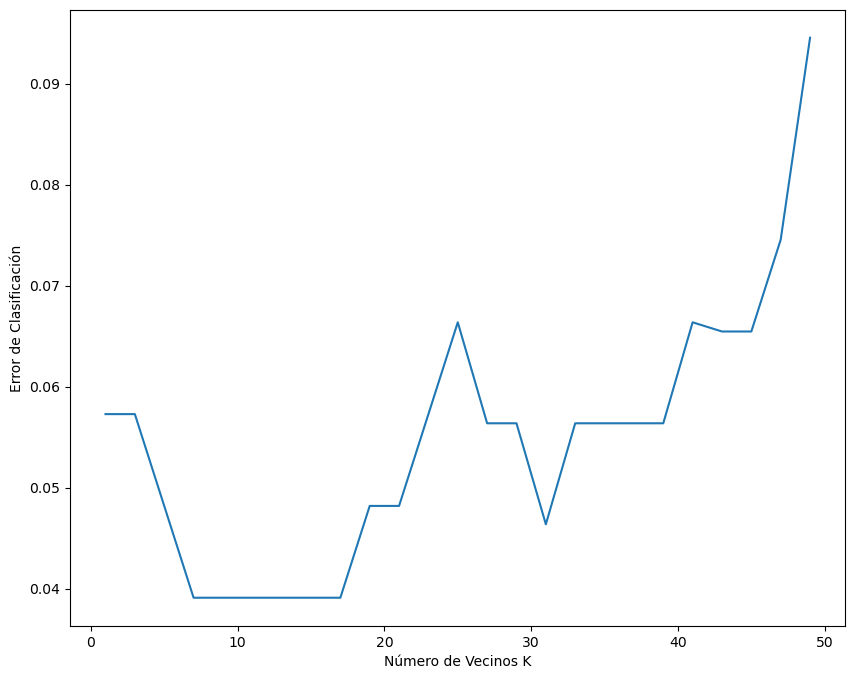

In [19]:
# cambiar a error de clasificación
MSE = [1 - x for x in exactitud_vc]

# determining best k
k_optimo = vecinos[MSE.index(min(MSE))]
print("El número optimo de vecinos es %d" % k_optimo)

# plot misclassification error vs k
plt.plot(vecinos, MSE)
plt.xlabel('Número de Vecinos K')
plt.ylabel('Error de Clasificación')
plt.show()

### Graficar las regiones de decisión.

Para poder visualizar las regiones de decisión usaremos solo dos de los atributos del conjunto de datos Iris

In [20]:
X2 = iris.data[:, [2, 3]]
y2 = iris.target
X2_entrenamiento, X2_prueba, y2_entrenamiento, y2_prueba = train_test_split(X2, y2, test_size=0.3, random_state=3)

Normalización de los atributos:

In [21]:
sc = StandardScaler()
sc.fit(X2_entrenamiento)
X2_entrenamiento = sc.transform(X2_entrenamiento)
X2_prueba = sc.transform(X2_prueba)

In [22]:
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X2_entrenamiento, y2_entrenamiento)
print("Exactitud: {:.3f}".format(knn7.score(X2_prueba, y2_prueba)))

Exactitud: 0.956


Combinar conjuntos de entrenamiento y conjuntos de prueba

In [23]:
X2_combinado = np.vstack((X2_entrenamiento, X2_prueba))
y2_combinado = np.hstack((y2_entrenamiento, y2_prueba))

/Users/wladimir/Documents/Cursos/AprendizajeAutomatico2024/notebooks/graficar_regiones_decision.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
/Users/wladimir/Documents/Cursos/AprendizajeAutomatico2024/notebooks/graficar_regiones_decision.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
/Users/wladimir/Documents/Cursos/AprendizajeAutomatico2024/notebooks/graficar_regiones_decision.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], cmap='summer', edgecolor='black',


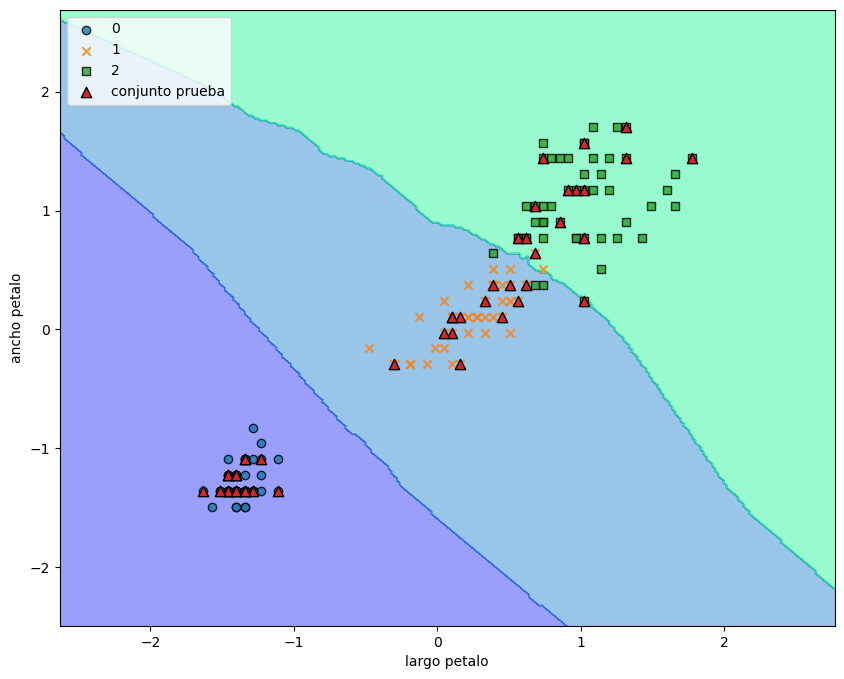

In [24]:
grd.graficar_regiones_decision(X2_combinado, y2_combinado, clasificador=knn7, indices_prueba=range(105,150))
plt.xlabel('largo petalo')
plt.ylabel('ancho petalo')
plt.legend(loc='upper left')
plt.show()